In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
data = pd.read_csv("C:/Users/Pratik Pansare/Downloads/parkinsons_updrs.csv")
warnings.filterwarnings("ignore")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [4]:
null_values = data.isnull().sum()
print(null_values)

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [5]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


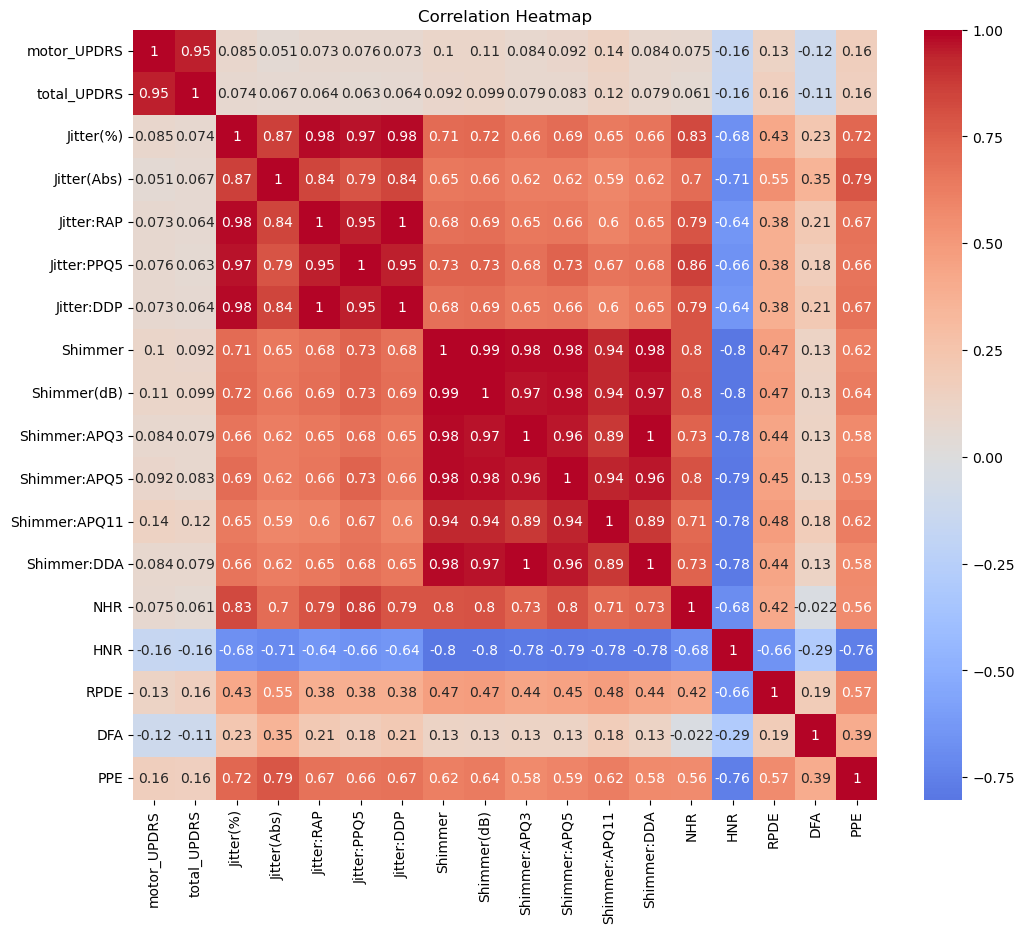

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = data.columns[4:22]

subset_data = data[selected_columns]

correlation_matrix = subset_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.show()

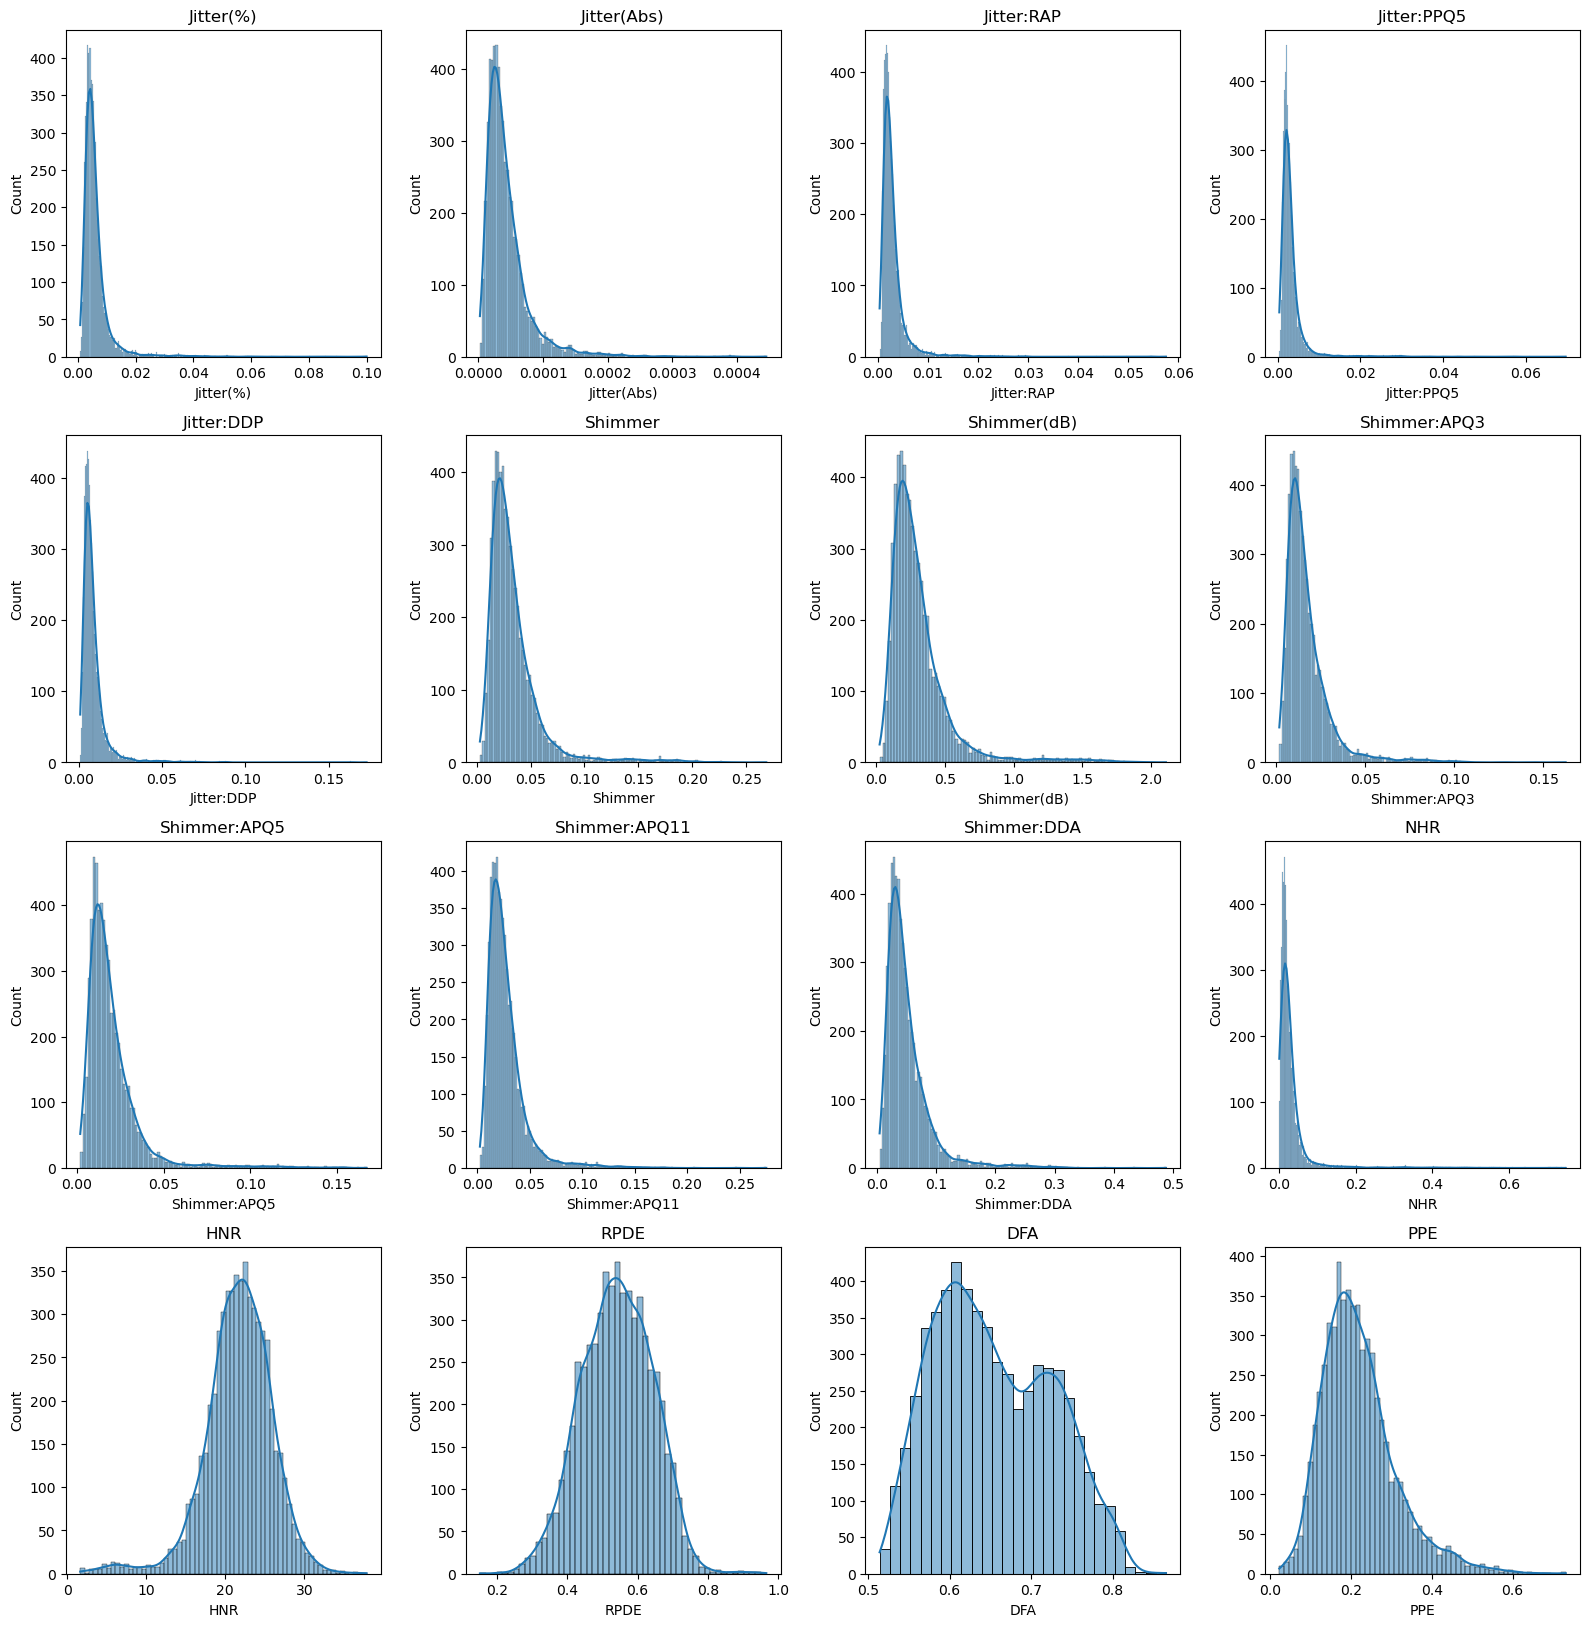

In [7]:
selected_columns = data.columns[6:22]

num_columns = 4
num_rows = (len(selected_columns) + num_columns) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

for idx, column in enumerate(selected_columns):
    row_idx = idx // num_columns
    col_idx = idx % num_columns
    
    sns.histplot(data[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(column)
    

for idx in range(len(selected_columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

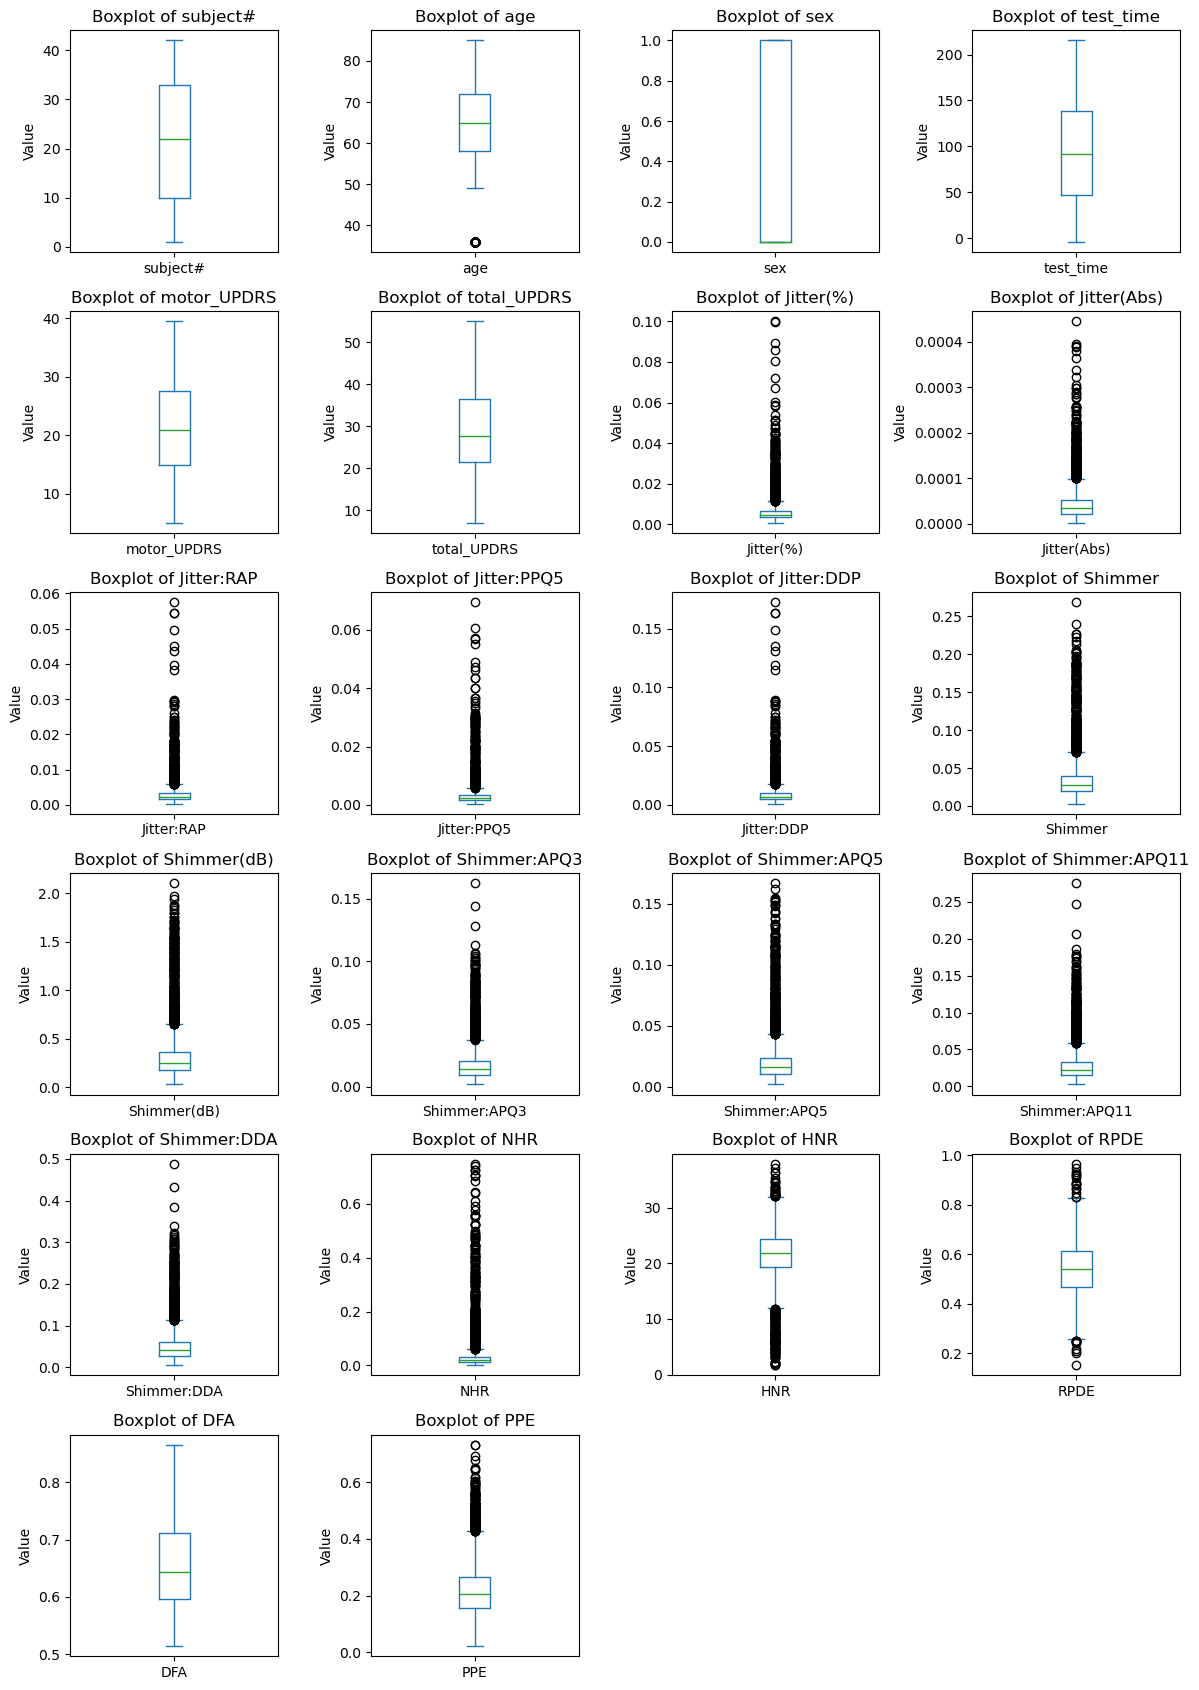

In [8]:
columns_for_boxplot = data.columns[0:22]


plt.figure(figsize=(12, 17))

for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(6, 4, i)
    data[column].plot(kind='box')
    plt.title(f'Boxplot of {column}')
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [9]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]


columns_to_remove_outliers =data.columns[6:22]

data1 = remove_outliers_iqr(data, columns_to_remove_outliers)

print("Original shape:", data.shape)
print("Shape after removing outliers:", data1.shape)


Original shape: (5875, 22)
Shape after removing outliers: (5044, 22)


In [10]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

skewed_columns = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
                  'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
                  'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR']

small_constant = 1e-5

for col in skewed_columns:
    transformed_data, _ = boxcox(data1[col] + small_constant)
    data1[col] = transformed_data

scaler = MinMaxScaler()
data1[skewed_columns] = scaler.fit_transform(data1[skewed_columns])



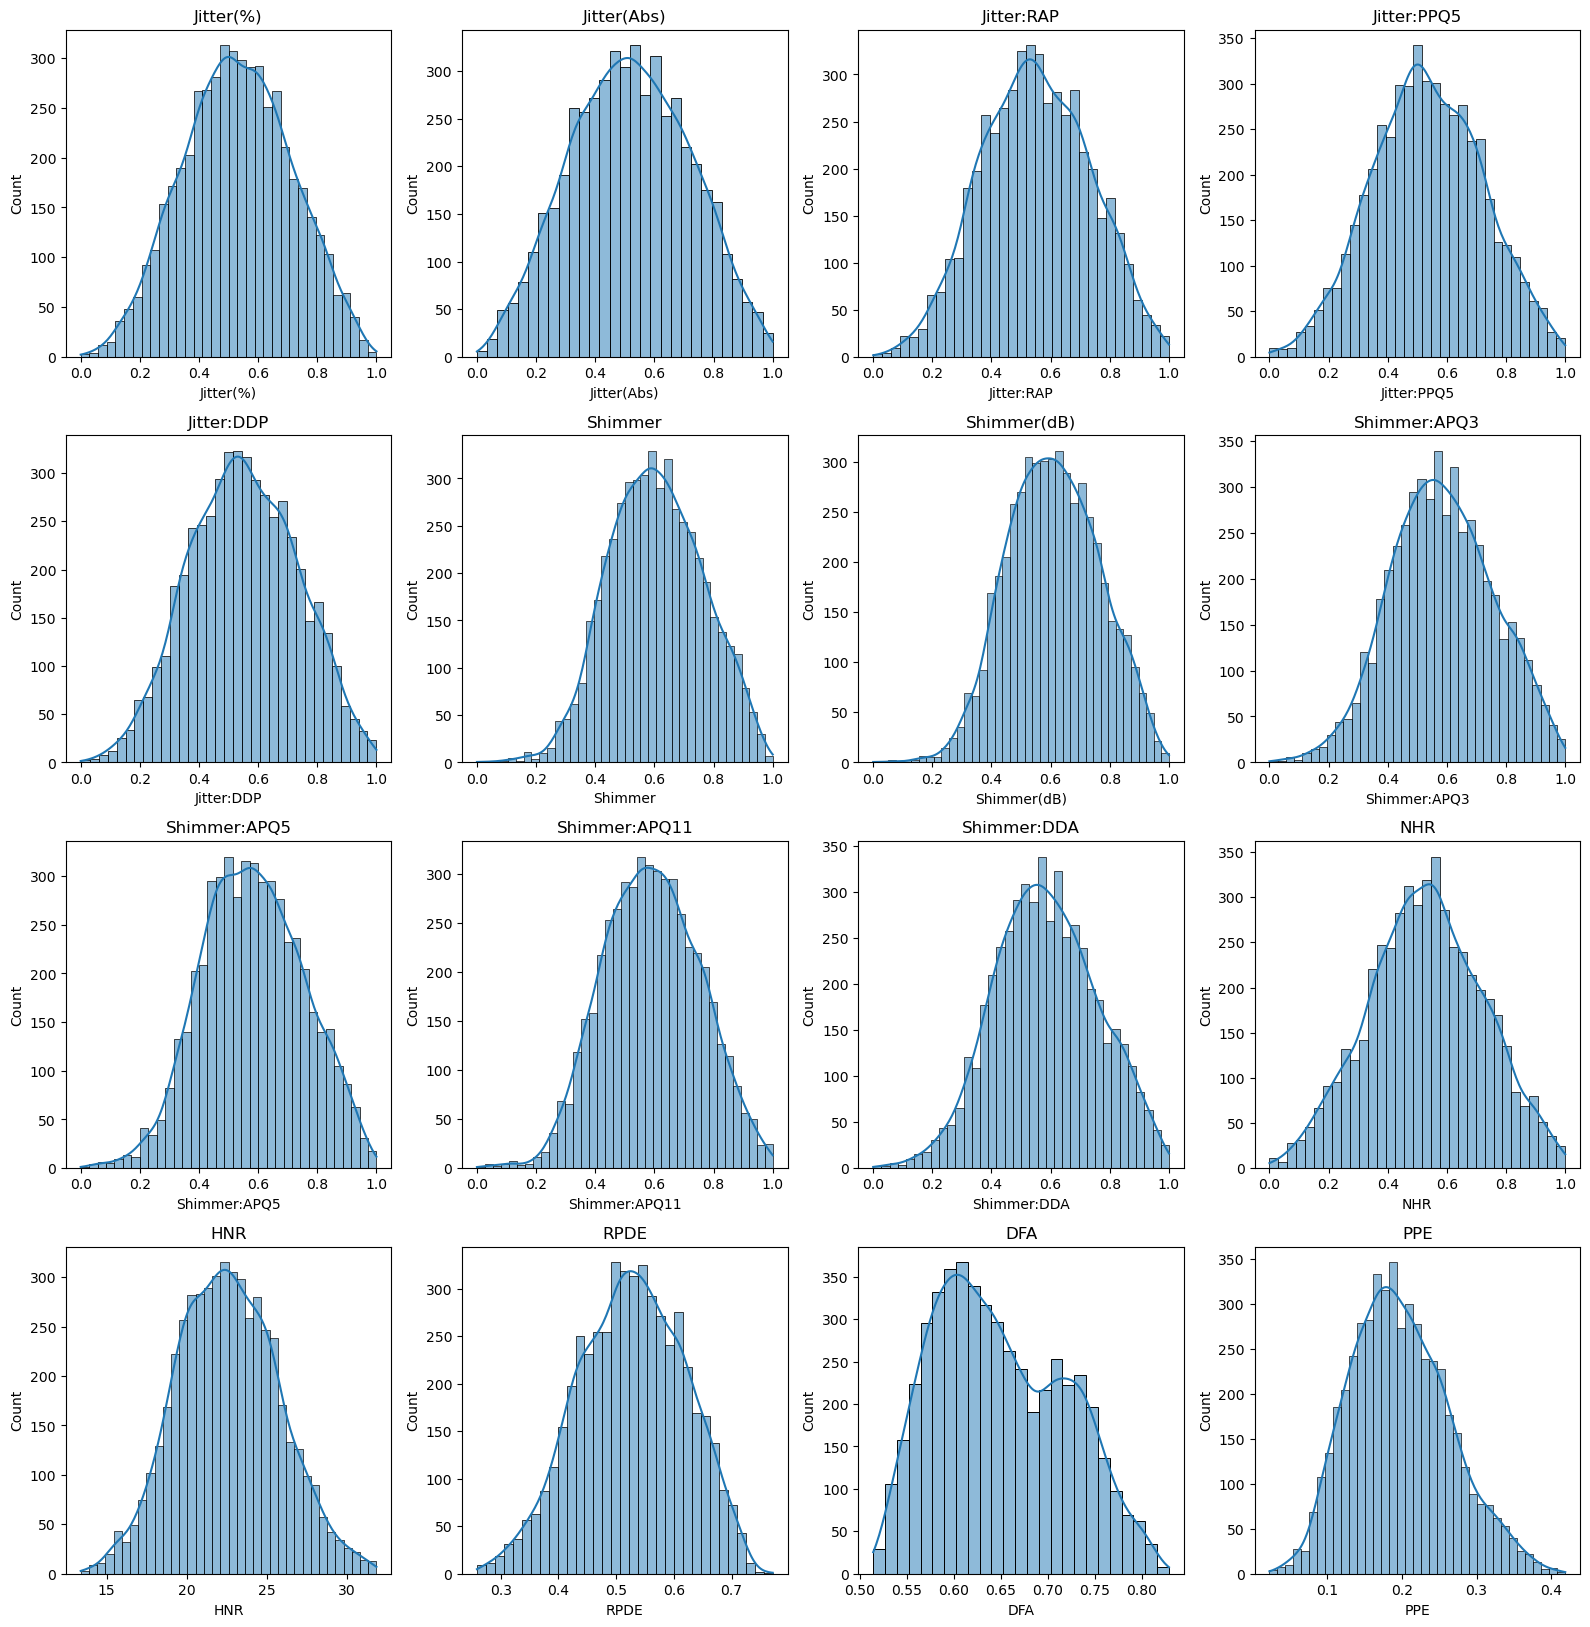

In [11]:
selected_columns = data1.columns[6:22]

num_columns = 4
num_rows = (len(selected_columns) + num_columns) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

for idx, column in enumerate(selected_columns):
    row_idx = idx // num_columns
    col_idx = idx % num_columns
    
    sns.histplot(data1[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(column)
    
for idx in range(len(selected_columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['test_time', 'subject#']
Data1 = data1.drop(columns=columns_to_drop)

target_columns = ['motor_UPDRS', 'total_UPDRS']
X = Data1.drop(target_columns, axis=1)
y = Data1[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Data", X_train.shape, y_train.shape)
print("Test Data", X_test.shape,y_test.shape)

Train Data (4035, 18) (4035, 2)
Test Data (1009, 18) (1009, 2)


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = DecisionTreeRegressor(random_state=123)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse_motor_UPDRS1 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS1 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS1 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS1 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("Decision Tree Regressor")
print("Model Preformace:",regressor.score(X_test, y_test))
print("Mean Squared Error(motor_UPDRS):", mse_motor_UPDRS1)
print("R-squared(motor_UPDRS):", r2_motor_UPDRS1)

print("Mean Squared Error(total_UPDRS):", mse_total_UPDRS1)
print("R-squared(total_UPDRS):", r2_total_UPDRS1)

Decision Tree Regressor
Model Preformace: 0.8351578056806619
Mean Squared Error(motor_UPDRS): 12.480864581397425
R-squared(motor_UPDRS): 0.8197979245126389
Mean Squared Error(total_UPDRS): 17.993644753201185
R-squared(total_UPDRS): 0.850517686848685


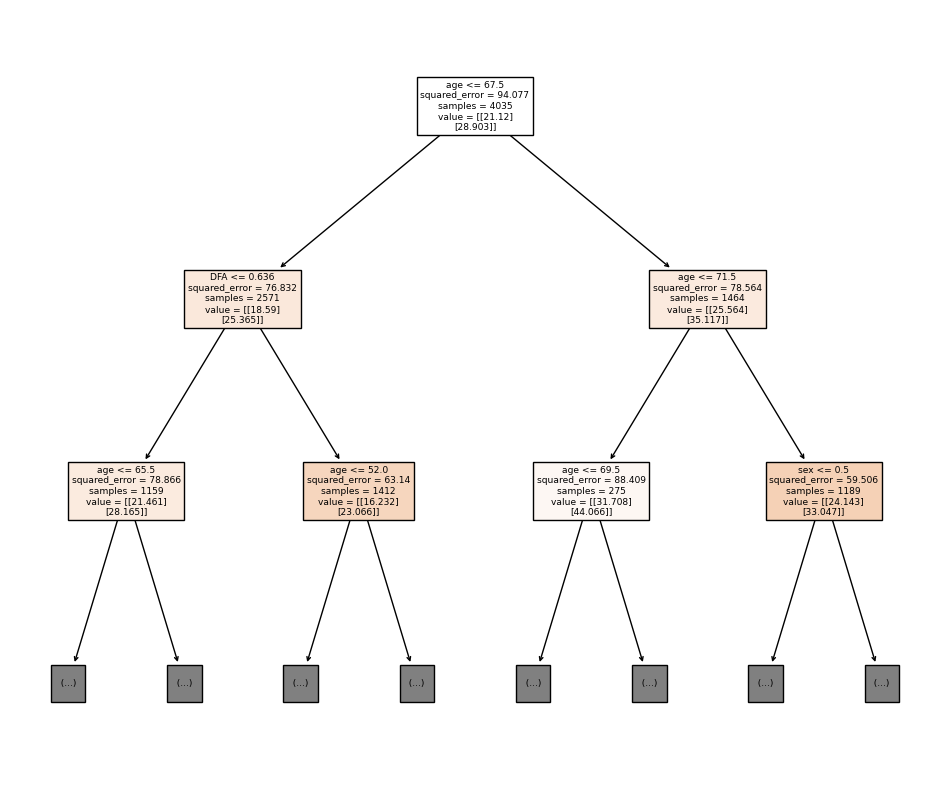

In [14]:
from sklearn.tree import plot_tree

from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(regressor, 
                   feature_names = list(X_train.columns), 
                   filled = True,max_depth = 2);

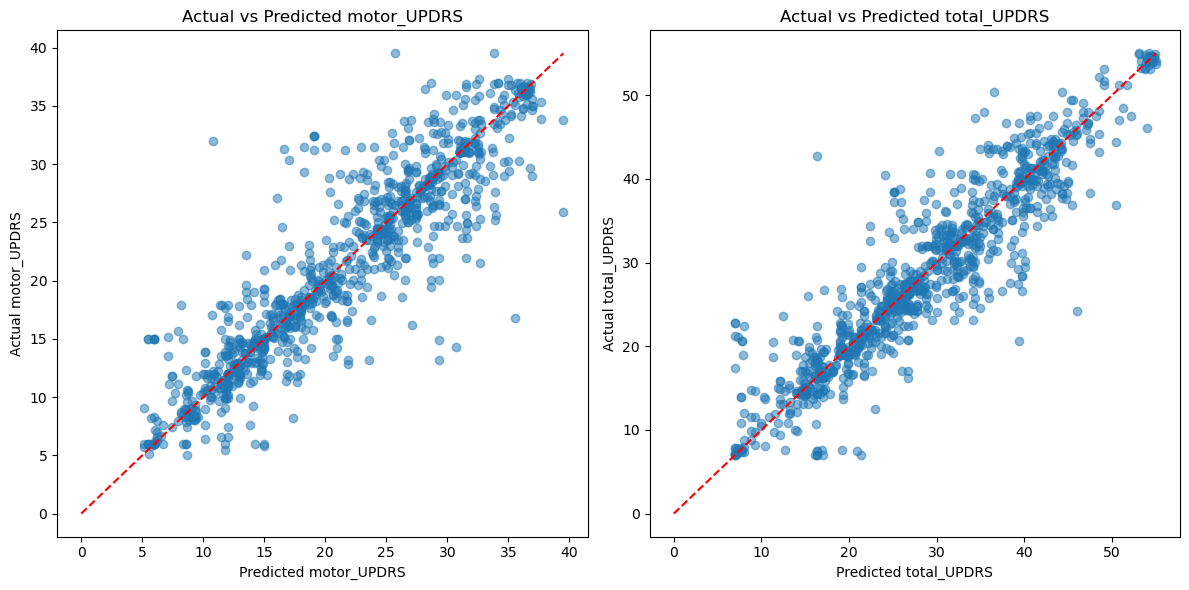

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], y_test['motor_UPDRS'], alpha=0.5)
plt.plot([0, max(y_test['motor_UPDRS'])], [0, max(y_test['motor_UPDRS'])], color='red', linestyle='--')
plt.xlabel('Predicted motor_UPDRS')
plt.ylabel('Actual motor_UPDRS')
plt.title('Actual vs Predicted motor_UPDRS')

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], y_test['total_UPDRS'], alpha=0.5)
plt.plot([0, max(y_test['total_UPDRS'])], [0, max(y_test['total_UPDRS'])], color='red', linestyle='--')
plt.xlabel('Predicted total_UPDRS')
plt.ylabel('Actual total_UPDRS')
plt.title('Actual vs Predicted total_UPDRS')

plt.tight_layout()    
plt.show()

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
base_regressor = GradientBoostingRegressor(random_state=123)

regressor = MultiOutputRegressor(base_regressor)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse_motor_UPDRS2 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS2 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS2 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS2 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("Gradient Boosting Regressor")
print("Model Performance:", regressor.score(X_test, y_test))
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS2)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS2)

print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS2)
print("R-squared (total_UPDRS):", r2_total_UPDRS2)

Gradient Boosting Regressor
Model Performance: 0.7551861557993748
Mean Squared Error (motor_UPDRS): 18.581867380275344
R-squared (motor_UPDRS): 0.7317100072259901
Mean Squared Error (total_UPDRS): 26.643097645787954
R-squared (total_UPDRS): 0.7786623043727594


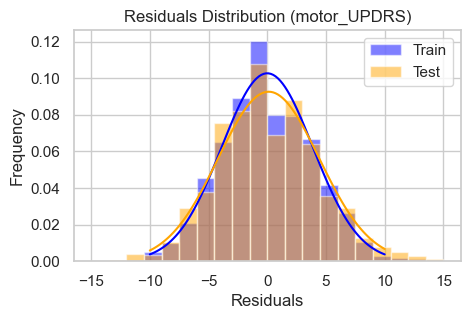

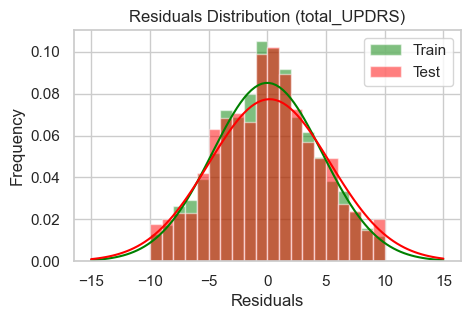

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm  

residuals_motor_train = y_train['motor_UPDRS'] - regressor.predict(X_train)[:, 0]
residuals_total_train = y_train['total_UPDRS'] - regressor.predict(X_train)[:, 1]

residuals_motor_test = y_test['motor_UPDRS'] - y_pred[:, 0]
residuals_total_test = y_test['total_UPDRS'] - y_pred[:, 1]
plt.figure(figsize=(5, 3))
plt.hist(residuals_motor_train, bins=20, range=(-15, 15), alpha=0.5, color='blue', label='Train', density=True)
plt.hist(residuals_motor_test, bins=20, range=(-15, 15), alpha=0.5, color='orange', label='Test', density=True)

# Calculate mean and standard deviation of residuals
mu_train_motor, std_train_motor = np.mean(residuals_motor_train), np.std(residuals_motor_train)
mu_test_motor, std_test_motor = np.mean(residuals_motor_test), np.std(residuals_motor_test)

x = np.linspace(-10, 10, 100)

plt.plot(x, norm.pdf(x, mu_train_motor, std_train_motor), color='blue')
plt.plot(x, norm.pdf(x, mu_test_motor, std_test_motor), color='orange')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (motor_UPDRS)')
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(residuals_total_train, bins=20, range=(-10, 10), alpha=0.5, color='green', label='Train', density=True)
plt.hist(residuals_total_test, bins=20, range=(-10, 10), alpha=0.5, color='red', label='Test', density=True)

mu_train_total, std_train_total = np.mean(residuals_total_train), np.std(residuals_total_train)
mu_test_total, std_test_total = np.mean(residuals_total_test), np.std(residuals_total_test)

x_total = np.linspace(-15, 15, 100)

plt.plot(x_total, norm.pdf(x_total, mu_train_total, std_train_total), color='green')
plt.plot(x_total, norm.pdf(x_total, mu_test_total, std_test_total), color='red')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (total_UPDRS)')
plt.legend()
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = KNeighborsRegressor(n_neighbors=5) 

regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

mse_motor_UPDRS3 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS3 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS3 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS3 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("K-Neighbors Regressor")
print("Model Performance:", regressor.score(X_test, y_test))
print("Mean Squared Error(motor_UPDRS):", mse_motor_UPDRS3)
print("R-squared(motor_UPDRS):", r2_motor_UPDRS3)

print("Mean Squared Error(total_UPDRS):", mse_total_UPDRS3)
print("R-squared(total_UPDRS):", r2_total_UPDRS3)



K-Neighbors Regressor
Model Performance: 0.8710825732548568
Mean Squared Error(motor_UPDRS): 9.214745163852529
R-squared(motor_UPDRS): 0.866955034021575
Mean Squared Error(total_UPDRS): 15.021341704870565
R-squared(total_UPDRS): 0.8752101124881386


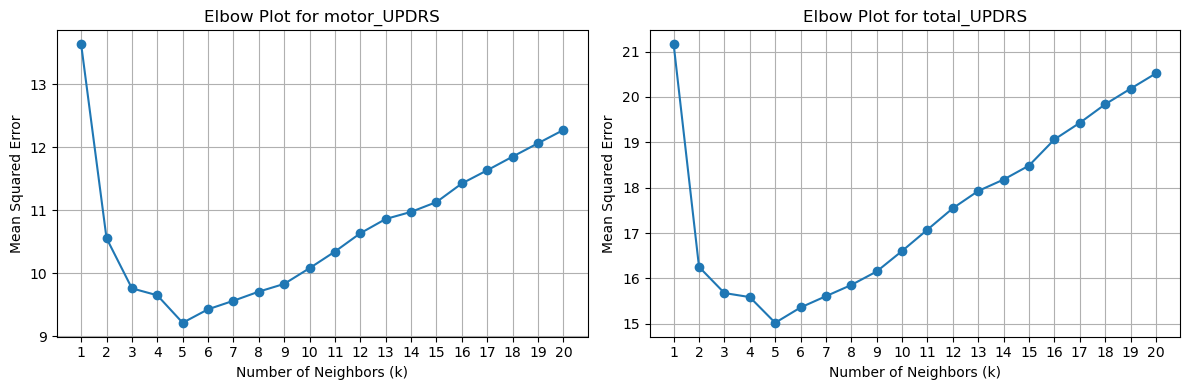

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
mse_values_motor = []
mse_values_total = []

k_values = range(1, 21) 

for k in k_values:
    regressor_motor = KNeighborsRegressor(n_neighbors=k)
    regressor_motor.fit(X_train, y_train['motor_UPDRS'])
    y_pred_motor = regressor_motor.predict(X_test)
    mse_motor = mean_squared_error(y_test['motor_UPDRS'], y_pred_motor)
    mse_values_motor.append(mse_motor)

    regressor_total = KNeighborsRegressor(n_neighbors=k)
    regressor_total.fit(X_train, y_train['total_UPDRS'])
    y_pred_total = regressor_total.predict(X_test)
    mse_total = mean_squared_error(y_test['total_UPDRS'], y_pred_total)
    mse_values_total.append(mse_total)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values_motor, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Plot for motor_UPDRS')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, mse_values_total, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Plot for total_UPDRS')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

mse_motor_UPDRS4 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS4 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS4 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS4 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("Random Forest Regressor")
print("Model Performance:",regressor.score(X_test, y_test))
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS4)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS4)

print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS4)
print("R-squared (total_UPDRS):", r2_total_UPDRS4)

Random Forest Regressor
Model Performance: 0.9042859721834777
Mean Squared Error (motor_UPDRS): 7.037693550626496
R-squared (motor_UPDRS): 0.8983878900218853
Mean Squared Error (total_UPDRS): 10.811420998360536
R-squared (total_UPDRS): 0.9101840543450701


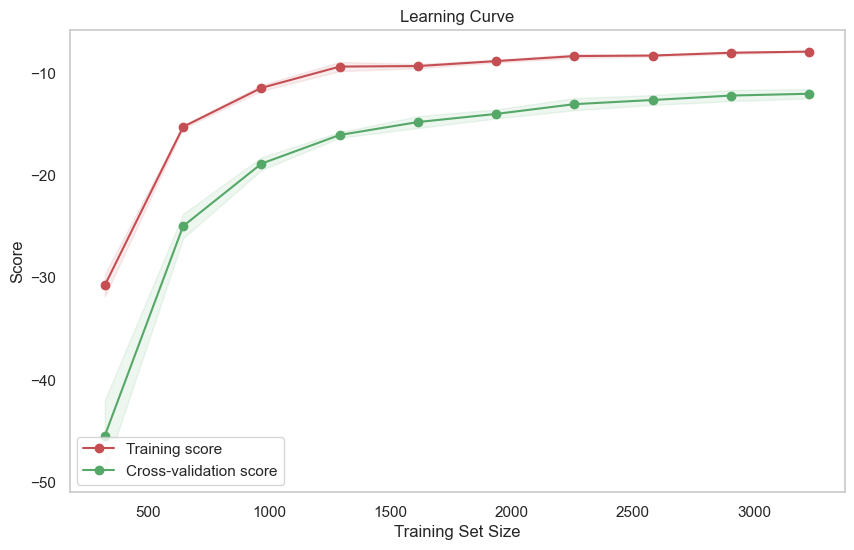

In [29]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv, scoring, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')



In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = [
     ('Decision Tree', DecisionTreeRegressor(random_state=123)),
     ('Gradient Boosting', GradientBoostingRegressor(random_state=123)),
     ('KNeighbors', KNeighborsRegressor(n_neighbors=5)),
     ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),  
]

scoring = make_scorer(mean_squared_error, greater_is_better=False)

for model_name, model in models:
    motor_scores = cross_val_score(model, X_train, y_train['motor_UPDRS'], cv=5, scoring=scoring)
    total_scores = cross_val_score(model, X_train, y_train['total_UPDRS'], cv=5, scoring=scoring)
    
    print(f"Model: {model_name}")
    print("Cross-Validation Mean MSE (motor_UPDRS):", -motor_scores.mean())
    print("Cross-Validation Mean MSE (total_UPDRS):", -total_scores.mean())
    print("----------------------------------------------")

Model: Decision Tree
Cross-Validation Mean MSE (motor_UPDRS): 15.158492010081783
Cross-Validation Mean MSE (total_UPDRS): 23.971726809697646
----------------------------------------------
Model: Gradient Boosting
Cross-Validation Mean MSE (motor_UPDRS): 16.722247003316888
Cross-Validation Mean MSE (total_UPDRS): 25.461436569539977
----------------------------------------------
Model: KNeighbors
Cross-Validation Mean MSE (motor_UPDRS): 9.268565591834449
Cross-Validation Mean MSE (total_UPDRS): 14.793466978040744
----------------------------------------------
Model: Random Forest
Cross-Validation Mean MSE (motor_UPDRS): 7.507955693958695
Cross-Validation Mean MSE (total_UPDRS): 11.348875245557208
----------------------------------------------


In [22]:
import pandas as pd
print("motor_UPDRS Model Selection Results:")
results_dict = {
    'Model': ['DecisionTree','Gradient Boosting', 'Random Forest', 'K-Nearest Neighbors'],
    'MSE ': [mse_motor_UPDRS1, mse_motor_UPDRS2, mse_motor_UPDRS3,mse_motor_UPDRS4],
    'R2': [r2_motor_UPDRS1, r2_motor_UPDRS2, r2_motor_UPDRS3,r2_motor_UPDRS4],
}
results_df = pd.DataFrame(results_dict)
print(results_df)
print("----------------------------------------------")
print("total_UPDRS Model Selection Results:")
results_dict1 = {
    'Model': ['DecisionTree','Gradient Boosting', 'Random Forest', 'K-Nearest Neighbors'],
    'MSE': [mse_total_UPDRS1, mse_total_UPDRS2, mse_total_UPDRS3, mse_total_UPDRS4],
    'R2': [r2_motor_UPDRS1, r2_motor_UPDRS2, r2_motor_UPDRS3,r2_motor_UPDRS4],
}
results_df1 = pd.DataFrame(results_dict1)
print(results_df1)

motor_UPDRS Model Selection Results:
                 Model       MSE         R2
0         DecisionTree  12.480865  0.819798
1    Gradient Boosting  18.581867  0.731710
2        Random Forest   9.214745  0.866955
3  K-Nearest Neighbors   7.037694  0.898388
----------------------------------------------
total_UPDRS Model Selection Results:
                 Model        MSE        R2
0         DecisionTree  17.993645  0.819798
1    Gradient Boosting  26.643098  0.731710
2        Random Forest  15.021342  0.866955
3  K-Nearest Neighbors  10.811421  0.898388


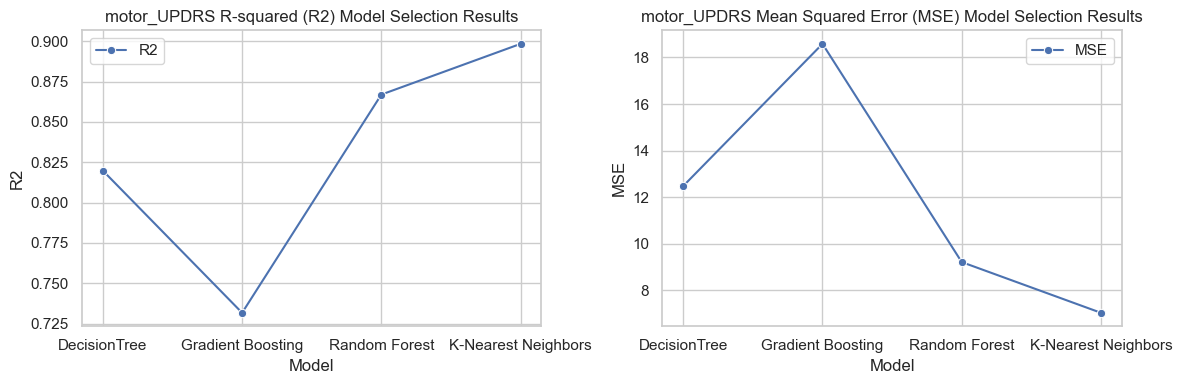

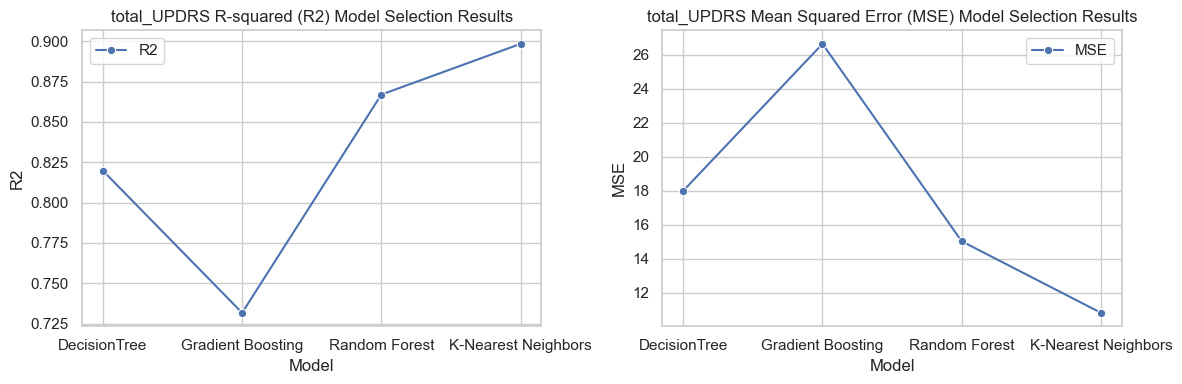

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=results_df, x='Model', y='R2', ax=axes[0], marker='o', label='R2')
axes[0].set_title('motor_UPDRS R-squared (R2) Model Selection Results')
axes[0].set_ylabel('R2')

sns.lineplot(data=results_df, x='Model', y='MSE ', ax=axes[1], marker='o', label='MSE')
axes[1].set_title('motor_UPDRS Mean Squared Error (MSE) Model Selection Results')
axes[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=results_df1, x='Model', y='R2', ax=axes[0], marker='o', label='R2')
axes[0].set_title('total_UPDRS R-squared (R2) Model Selection Results')
axes[0].set_ylabel('R2')

sns.lineplot(data=results_df1, x='Model', y='MSE', ax=axes[1], marker='o', label='MSE')
axes[1].set_title('total_UPDRS Mean Squared Error (MSE) Model Selection Results')
axes[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = DecisionTreeRegressor(random_state=123)

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test)

mse_motor_UPDRS11 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS11 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS11 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS11 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("Decision Tree Regressor (Tuned)")
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS11)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS11)

print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS11)
print("R-squared (total_UPDRS):", r2_total_UPDRS11)

Decision Tree Regressor (Tuned)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error (motor_UPDRS): 9.857545999564849
R-squared (motor_UPDRS): 0.857674102883758
Mean Squared Error (total_UPDRS): 15.012653277164159
R-squared (total_UPDRS): 0.8752822916541172


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

base_regressor = GradientBoostingRegressor(random_state=123)

regressor = MultiOutputRegressor(base_regressor)

param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test)

mse_motor_UPDRS22 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS22 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS22 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS22 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])


print("Gradient Boosting Regressorr (Tuned)")
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS22)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS22)

print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS22)
print("R-squared (total_UPDRS):", r2_total_UPDRS22)

Gradient Boosting Regressorr (Tuned)
Best Hyperparameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 200}
Mean Squared Error (motor_UPDRS): 8.432348273356556
R-squared (motor_UPDRS): 0.8782514904972246
Mean Squared Error (total_UPDRS): 11.991433983775103
R-squared (total_UPDRS): 0.9003810892967034


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test)

mse_motor_UPDRS33 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS33 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS33 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS33 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("K-Neighbors Regressor (Tuned)")
print("Best Parameters:", grid_search.best_params_)
print("Model Performance:", best_regressor.score(X_test, y_test))
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS33)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS33)
print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS33)
print("R-squared (total_UPDRS):", r2_total_UPDRS33)


K-Neighbors Regressor (Tuned)
Best Parameters: {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Model Performance: 0.8708035534052031
Mean Squared Error (motor_UPDRS): 9.319289644989832
R-squared (motor_UPDRS): 0.8654455927197464
Mean Squared Error (total_UPDRS): 14.906818574391169
R-squared (total_UPDRS): 0.8761615140906597


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test)

mse_motor_UPDRS44 = mean_squared_error(y_test['motor_UPDRS'], y_pred[:, 0])
mse_total_UPDRS44 = mean_squared_error(y_test['total_UPDRS'], y_pred[:, 1])

r2_motor_UPDRS44 = r2_score(y_test['motor_UPDRS'], y_pred[:, 0])
r2_total_UPDRS44 = r2_score(y_test['total_UPDRS'], y_pred[:, 1])

print("Random Forest Regressor (Tuned)")
print("Best Parameters:", grid_search.best_params_)
print("Model Performance:", best_regressor.score(X_test, y_test))
print("Mean Squared Error (motor_UPDRS):", mse_motor_UPDRS44)
print("R-squared (motor_UPDRS):", r2_motor_UPDRS44)
print("Mean Squared Error (total_UPDRS):", mse_total_UPDRS44)
print("R-squared (total_UPDRS):", r2_total_UPDRS44)


Random Forest Regressor (Tuned)
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Model Performance: 0.90492489520452
Mean Squared Error (motor_UPDRS): 6.9835779917039496
R-squared (motor_UPDRS): 0.8991692249983531
Mean Squared Error (total_UPDRS): 10.751654437739358
R-squared (total_UPDRS): 0.9106805654106874


In [51]:
import pandas as pd
print("motor_UPDRS Model Selection Results(tuned):")
results_dict3 = {
    'Model': ['DecisionTree','Gradient Boosting', 'Random Forest', 'K-Nearest Neighbors'],
    'MSE ': [mse_motor_UPDRS11, mse_motor_UPDRS22, mse_motor_UPDRS33,mse_motor_UPDRS44],
    'R2': [r2_motor_UPDRS11, r2_motor_UPDRS22, r2_motor_UPDRS33,r2_motor_UPDRS44],
}
results_df3 = pd.DataFrame(results_dict3)
print(results_df3)
print("----------------------------------------------")
print("total_UPDRS Model Selection Results(Tuned):")
results_dict4 = {
    'Model': ['DecisionTree','Gradient Boosting', 'Random Forest', 'K-Nearest Neighbors'],
    'MSE': [mse_total_UPDRS11, mse_total_UPDRS22, mse_total_UPDRS33, mse_total_UPDRS44],
    'R2': [r2_motor_UPDRS11, r2_motor_UPDRS22, r2_motor_UPDRS33,r2_motor_UPDRS44],
}
results_df4 = pd.DataFrame(results_dict4)
print(results_df4)

motor_UPDRS Model Selection Results(tuned):
                 Model      MSE         R2
0         DecisionTree  9.857546  0.857674
1    Gradient Boosting  8.432348  0.878251
2        Random Forest  9.319290  0.865446
3  K-Nearest Neighbors  6.983578  0.899169
----------------------------------------------
total_UPDRS Model Selection Results(Tuned):
                 Model        MSE        R2
0         DecisionTree  15.012653  0.857674
1    Gradient Boosting  11.991434  0.878251
2        Random Forest  14.906819  0.865446
3  K-Nearest Neighbors  10.751654  0.899169


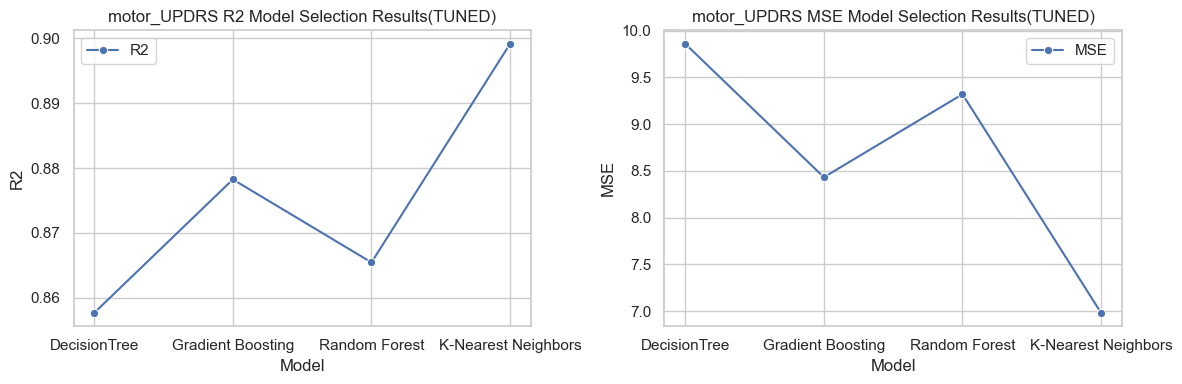

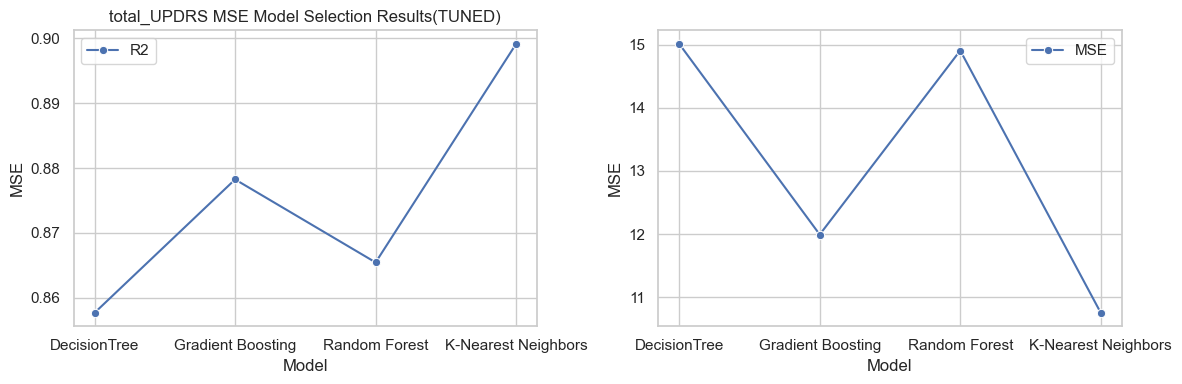

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=results_df3, x='Model', y='R2', ax=axes[0], marker='o', label='R2')
axes[0].set_title('motor_UPDRS R2 Model Selection Results(TUNED)')
axes[0].set_ylabel('R2')

sns.lineplot(data=results_df3, x='Model', y='MSE ', ax=axes[1], marker='o', label='MSE')
axes[1].set_title('motor_UPDRS MSE Model Selection Results(TUNED)')
axes[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=results_df4, x='Model', y='R2', ax=axes[0], marker='o', label='R2')
axes[0].set_title('total_UPDRS R2 Model Selection Results(TUNED)')
axes[0].set_ylabel('R2')

sns.lineplot(data=results_df4, x='Model', y='MSE', ax=axes[1], marker='o', label='MSE')
axes[0].set_title('total_UPDRS MSE Model Selection Results(TUNED)')
axes[0].set_ylabel('MSE')

plt.tight_layout()
plt.show()